
# COVID-19: From global data to country statistics

Data collected from:

https://pomber.github.io/covid19/timeseries.json

(c) AJEsteves, April 2020

In [1]:
import pandas as pd
import json
from   json import JSONDecoder, JSONDecodeError
import matplotlib.pyplot as plt
import urllib
import urllib.parse
import os

In [2]:
# !wget https://pomber.github.io/covid19/timeseries.json

In [3]:
url = f"https://pomber.github.io/covid19/timeseries.json"

global_data = []

with urllib.request.urlopen(url) as response:
    raw_data = response.read()
    str_data = raw_data.decode("utf-8")

    decoder = json.JSONDecoder()
    try:
        json_data = decoder.decode(str_data)
    except JSONDecodeError:
        print("JSON Decode Error!")
    else:
        # data is now a dictionary: key=country name, value=list of dictionaries, 
        # where each dictionary includes 4 key-value pairs (date, confirmed, deaths, recovered) 
        
        for country, country_stats in json_data.items():
            # print(country)
        
            for day_stat in country_stats:
                day = [country,day_stat['date'],day_stat['confirmed'],day_stat['deaths'],day_stat['recovered']]
                global_data.append(day)
                
        global_df = pd.DataFrame(global_data, columns =['country','date','accum_cases','accum_deaths','accum_recovered'])

In [4]:
global_df.head()

,country,date,accum_cases,accum_deaths,accum_recovered
0,Afghanistan,2020-1-22,0,0,0
1,Afghanistan,2020-1-23,0,0,0
2,Afghanistan,2020-1-24,0,0,0
3,Afghanistan,2020-1-25,0,0,0
4,Afghanistan,2020-1-26,0,0,0


In [5]:
global_df.tail()

,country,date,accum_cases,accum_deaths,accum_recovered
17385,Yemen,2020-4-20,1,0,0
17386,Yemen,2020-4-21,1,0,0
17387,Yemen,2020-4-22,1,0,0
17388,Yemen,2020-4-23,1,0,0
17389,Yemen,2020-4-24,1,0,1


In [6]:
global_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accum_cases,17390.0,3177.937780,26118.604818,0.0,0.0,2.0,135.0,905358.0
accum_deaths,17390.0,190.443991,1707.601026,0.0,0.0,0.0,2.0,51949.0
accum_recovered,17390.0,805.386601,6230.580773,0.0,0.0,0.0,9.0,109800.0


In [7]:
print(f"MEAN:     {global_df['accum_cases'].mean():.2f}")
print(f"STD DEV:  {global_df['accum_cases'].std():.2f}")
print(f"VARIANCE: {global_df['accum_cases'].var():.2f}")
print(f"MINIMUM:  {global_df['accum_cases'].min():.2f}")
print(f"MAXIMUM:  {global_df['accum_cases'].max():.2f}")

MEAN:     3177.94
STD DEV:  26118.60
VARIANCE: 682181517.64
MINIMUM:  0.00
MAXIMUM:  905358.00


### Filter rows for a country: Portugal

In [8]:
pt_covdf = global_df[global_df['country']=='Portugal']
pt_covdf.head()

,country,date,accum_cases,accum_deaths,accum_recovered
11374,Portugal,2020-1-22,0,0,0
11375,Portugal,2020-1-23,0,0,0
11376,Portugal,2020-1-24,0,0,0
11377,Portugal,2020-1-25,0,0,0
11378,Portugal,2020-1-26,0,0,0


In [9]:
pt_covdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 11374 to 11467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          94 non-null     object
 1   date             94 non-null     object
 2   accum_cases      94 non-null     int64 
 3   accum_deaths     94 non-null     int64 
 4   accum_recovered  94 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 4.4+ KB


In [10]:
pt_covdf['date'] = pd.to_datetime(pt_covdf.date,dayfirst=False)

pt_covdf.head()

/opt/anaconda3/envs/py3-tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,date,accum_cases,accum_deaths,accum_recovered
11374,Portugal,2020-01-22,0,0,0
11375,Portugal,2020-01-23,0,0,0
11376,Portugal,2020-01-24,0,0,0
11377,Portugal,2020-01-25,0,0,0
11378,Portugal,2020-01-26,0,0,0


In [11]:
pt_covdf1 = pt_covdf.reset_index()
pt_covdf2 = pt_covdf1.drop(['index'],axis=1)

pt_covdf2.head()

,country,date,accum_cases,accum_deaths,accum_recovered
0,Portugal,2020-01-22,0,0,0
1,Portugal,2020-01-23,0,0,0
2,Portugal,2020-01-24,0,0,0
3,Portugal,2020-01-25,0,0,0
4,Portugal,2020-01-26,0,0,0


### Making sure data is sorted by ascending value of "date" column

In [12]:
pt_covdf3 = pt_covdf2.sort_values(by=['date'], axis=0, ascending=True)

pt_covdf3.head()

,country,date,accum_cases,accum_deaths,accum_recovered
0,Portugal,2020-01-22,0,0,0
1,Portugal,2020-01-23,0,0,0
2,Portugal,2020-01-24,0,0,0
3,Portugal,2020-01-25,0,0,0
4,Portugal,2020-01-26,0,0,0


In [13]:
pt_covdf3 = pt_covdf3.reset_index()
pt_covdf3 = pt_covdf3.drop(['index'],axis=1)

pt_covdf3.head()

,country,date,accum_cases,accum_deaths,accum_recovered
0,Portugal,2020-01-22,0,0,0
1,Portugal,2020-01-23,0,0,0
2,Portugal,2020-01-24,0,0,0
3,Portugal,2020-01-25,0,0,0
4,Portugal,2020-01-26,0,0,0


In [14]:
# pt_covdf3.to_csv("covid19-pt3.csv")

### Compute difference among sucessive accumlated values to get daily statistics

In [15]:
pt_covdf3["cases"] = pt_covdf3["accum_cases"].diff(1)
pt_covdf3.at[0,'cases'] = pt_covdf3.at[0,'accum_cases'] 

pt_covdf3["deaths"] = pt_covdf3["accum_deaths"].diff(1)
pt_covdf3.at[0,'deaths'] = pt_covdf3.at[0,'accum_deaths']

pt_covdf3["recovered"] = pt_covdf3["accum_recovered"].diff(1)
pt_covdf3.at[0,'recovered'] = pt_covdf3.at[0,'accum_recovered'] 

In [16]:
# pt_covdf3.to_csv("covid19-pt4.csv")

pt_covdf3.head()

,country,date,accum_cases,accum_deaths,accum_recovered,cases,deaths,recovered
0,Portugal,2020-01-22,0,0,0,0.0,0.0,0.0
1,Portugal,2020-01-23,0,0,0,0.0,0.0,0.0
2,Portugal,2020-01-24,0,0,0,0.0,0.0,0.0
3,Portugal,2020-01-25,0,0,0,0.0,0.0,0.0
4,Portugal,2020-01-26,0,0,0,0.0,0.0,0.0


## PLot data

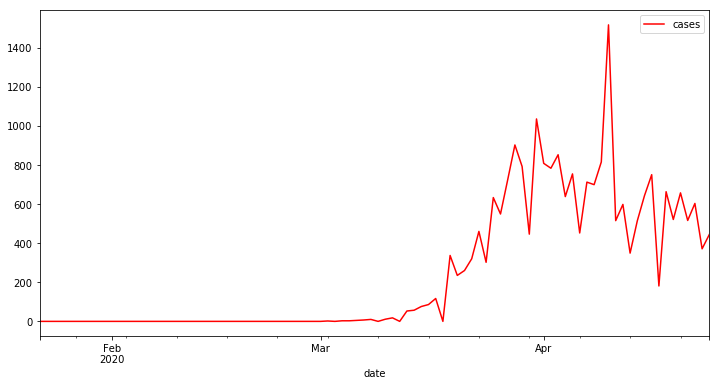

In [17]:
ax = plt.gca()

pt_covdf3.plot(kind='line',x='date',y='cases', figsize=(12,6), color='red', ax=ax)
plt.show()

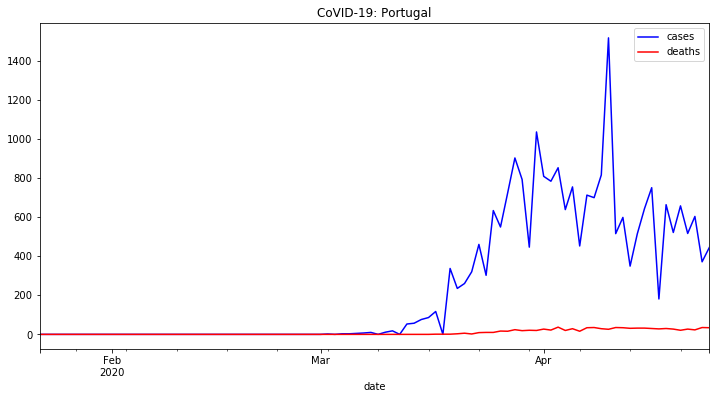

In [18]:
ax = plt.gca()

pt_covdf3.plot(kind='line',x='date',y='cases',figsize=(12,6),color='blue', ax=ax)
# plt.ylabel('New Cases')

pt_covdf3.plot(kind='line',x='date',y='deaths',figsize=(12,6),color='red', ax=ax)
plt.title('CoVID-19: Portugal')
#plt.ylabel('Deaths')

plt.show()

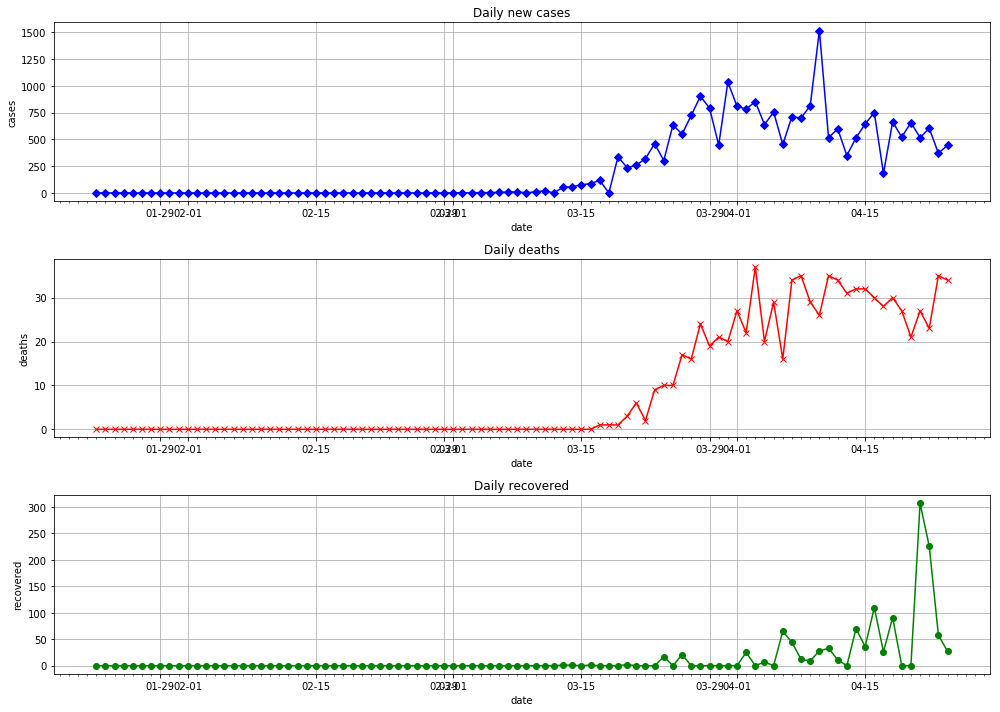

In [22]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axs = plt.subplots(3, 1, figsize=(14, 10))

# Define the date format
date_form = DateFormatter("%m-%d")

axs[0].plot(pt_covdf3['date'], pt_covdf3['cases'], 'bD-')
axs[0].set_xlabel('date')
axs[0].set_ylabel('cases')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_minor_locator(mdates.DayLocator())
axs[0].set_title('Daily new cases')

axs[1].plot(pt_covdf3['date'], pt_covdf3['deaths'], "rx-")
axs[1].set_xlabel('date')
axs[1].set_ylabel('deaths')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_minor_locator(mdates.DayLocator())
axs[1].set_title('Daily deaths')

axs[2].plot(pt_covdf3['date'], pt_covdf3['recovered'], "go-")
axs[2].set_xlabel('date')
axs[2].set_ylabel('recovered')
axs[2].grid(True)
axs[2].xaxis.set_major_formatter(date_form)
axs[2].xaxis.set_minor_locator(mdates.DayLocator())
axs[2].set_title('Daily recovered')

fig.tight_layout()
plt.show()

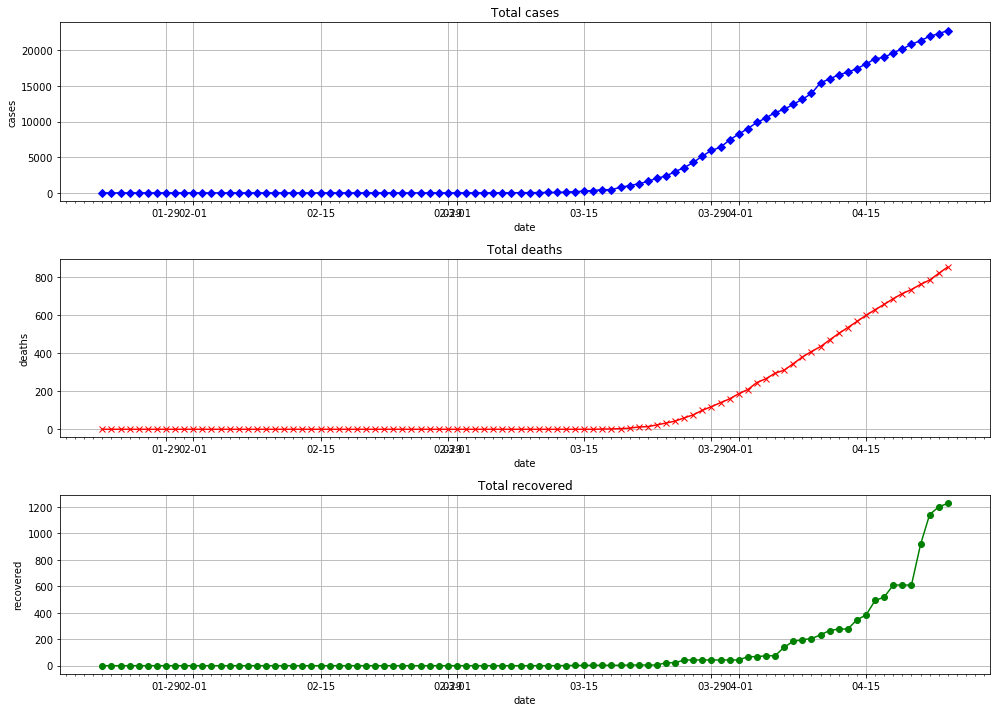

In [25]:
import matplotlib.dates as mdates
from   matplotlib.dates import DateFormatter

fig, axs = plt.subplots(3, 1, figsize=(14, 10))

# Define the date format
date_form = DateFormatter("%m-%d")

axs[0].plot(pt_covdf3['date'], pt_covdf3['accum_cases'], 'bD-')
axs[0].set_xlabel('date')
axs[0].set_ylabel('cases')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_minor_locator(mdates.DayLocator())
axs[0].set_title('Total cases')

axs[1].plot(pt_covdf3['date'], pt_covdf3['accum_deaths'], "rx-")
axs[1].set_xlabel('date')
axs[1].set_ylabel('deaths')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_minor_locator(mdates.DayLocator())
axs[1].set_title('Total deaths')

axs[2].plot(pt_covdf3['date'], pt_covdf3['accum_recovered'], "go-")
axs[2].set_xlabel('date')
axs[2].set_ylabel('recovered')
axs[2].grid(True)
axs[2].xaxis.set_major_formatter(date_form)
axs[2].xaxis.set_minor_locator(mdates.DayLocator())
axs[2].set_title('Total recovered')

fig.tight_layout()
plt.show()

Add a column to a dataframe:
df['protected'] = pd.Series(['no', 'no', 'no', 'yes'], index=df.index)